Decision Tree Regression on Titanic Dataset

In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('./Data/titanic.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
cols_to_drop=['PassengerId','Name','Ticket','Cabin','Embarked']

data=data.drop(cols_to_drop,axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [6]:
sex_mapping={'male':0,'female':1}
data.Sex=data.Sex.map(sex_mapping)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [7]:
print(data.shape)

(891, 7)


In [8]:
data=data.dropna()
print(data.shape)
data.describe()

(714, 7)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


<AxesSubplot:>

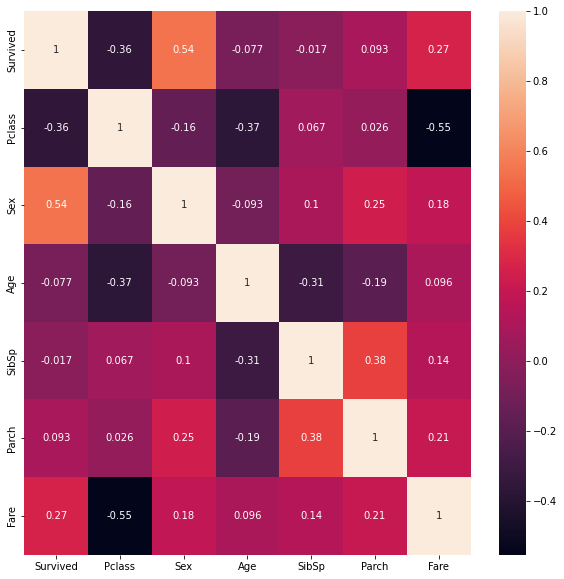

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [10]:
x=data.drop('Survived',axis=1)
y=data.Survived
print(x.shape, y.shape)

(714, 6) (714,)


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(571, 6) (143, 6) (571,) (143,)


In [12]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
score = dt.score(x_test,y_test)
score

0.7692307692307693

In [14]:
test_vector=np.array([3,1,26.0,0,0,7.9250])
test_vector=np.reshape(test_vector,(1,6))
print(test_vector)
test_vector.shape

[[ 3.     1.    26.     0.     0.     7.925]]


(1, 6)

In [15]:
y_pred=dt.predict(test_vector)
print(y_pred)

[1]


C:\Users\Harsh Ranjan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [16]:
y_pred=dt.predict(x_test)
print(y_pred.shape)
y_test.shape

(143,)


(143,)

In [17]:
cmp=np.array([y_pred,y_test])
cmp=cmp.reshape(len(y_pred),2)
#print(cmp)

In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[71, 22],
       [11, 39]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score : 0.7692307692307693')

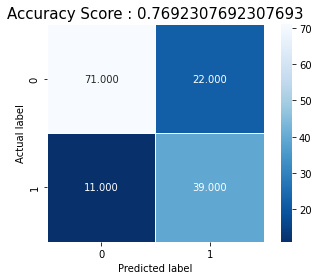

In [19]:
sns.heatmap(cm,annot=True,fmt='.3f',linewidths=.5, square=True, cmap='Blues_r')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
all_sample_title='Accuracy Score : {0}'.format(score)
plt.title(all_sample_title,size=15)